# Temel Veri Ön İşleme (Data Preprocessing)

Hoş geldiniz! 👋

Bu not defteri, Veri Bilimi dünyasına adım atanlar için hazırlanmıştır. Hiçbir ön bilginiz olmasa bile, adım adım ilerleyerek ham veriyi nasıl analize hazır hale getireceğinizi öğreneceksiniz.

## 🎯 Bu Rehberde Neler Öğreneceksiniz?
1. **Veri Ön İşleme Nedir?** Neden bu kadar önemli?
2. **Veriyi Yükleme ve İnceleme:** Verimiz neye benziyor?
3. **Keşifçi Veri Analizi (EDA):** Veriyi görselleştirme ve anlama.
4. **Eksik Veriler (Missing Values):** Kayıp verilerle nasıl başa çıkarız?
5. **Aykırı Değerler (Outliers):** Aşırı uç değerleri nasıl tespit ederiz?
6. **Kategorik Değişkenler:** Yazı (string) verileri sayılara çevirme.
7. **Özellik Ölçeklendirme (Scaling):** Verileri aynı ölçeğe getirme.
8. **Özellik Mühendisliği (Feature Engineering):** Yeni özellikler türetme.
9. **Eğitim/Test Ayrımı (Train/Test Split):** Modelimizi nasıl test edeceğiz?
10. **Tüm Süreç (Pipeline):** Hepsini birleştirelim.

---

## BÖLÜM 1: Giriş – Veri Ön İşleme Nedir?

Bir yemek yaptığınızı düşünün. 🍳 En iyi yemeği yapmak için önce malzemeleri yıkamanız, soymanız ve doğramanız gerekir. Çürük domatesleri atar, patatesleri soyarsınız. İşte **Veri Ön İşleme** de budur.

Makine öğrenmesi modelleri matematikle çalışır. Kirli, eksik veya düzensiz veriyi bu modellere verirseniz, sonuç da kötü olur.

> **"Garbage in, garbage out"** (Çöp girerse, çöp çıkar) ilkesi buradan gelir.

Hadi başlayalım! 🚀

## BÖLÜM 2: Veri Setini Tanıyalım

Bu çalışma için hazırladığımız `dataset.csv` dosyasını kullanacağız. Bu verisetinde ev fiyatları ve evlerin bazı özellikleri bulunuyor.

### 📊 Veriset Hakkında Ön Bilgi

**Verisetimizin Özellikleri:**
- **Satır Sayısı:** ~100 ev örneği
- **Sütun Sayısı:** 5 değişken (4 girdi + 1 hedef)
- **Veri Tipi:** Sayısal (Numeric) ve Kategorik (Categorical) karışımı
- **Kullanım Amacı:** Ev özellikleriyle fiyat tahmini (Regression problemi)

İlk işimiz kütüphaneleri çağırmak ve veriyi okumak.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları kapatalım (daha temiz bir görüntü için)
import warnings
warnings.filterwarnings('ignore')

# Veriyi yükleyelim
df = pd.read_csv("dataset.csv")

# İlk 5 satırı görelim
df.head()

,Ev_Buyuklugu,Oda_Sayisi,Konum,Bina_Yasi,Fiyat
0,120.0,3.0,Merkez,5.0,2500000
1,150.0,4.0,Merkez,2.0,3200000
2,90.0,2.0,Kirsal,10.0,1500000
3,200.0,5.0,Banliyo,1.0,4500000
4,110.0,3.0,Merkez,15.0,2100000


**Çıktıyı Yorumlayalım:**
- `Ev_Buyuklugu`: Evin metrekaresi (m²)
- `Oda_Sayisi`: Odaların sayısı
- `Konum`: Evin bulunduğu bölge (Merkez, Banliyö, Kırsal)
- `Bina_Yasi`: Binanın yaşı
- `Fiyat`: Evin satış fiyatı (Hedef değişkenimiz / Target)

## BÖLÜM 3: Keşifçi Veri Analizi (Exploratory Data Analysis - EDA)

Veriyi temizlemeye başlamadan önce, neyle karşı karşıya olduğumuzu anlamalıyız. Doktorun ameliyattan önce röntgen çekmesi gibidir. 🩺

In [2]:
# Veri seti hakkında genel bilgi (Satır sayısı, sütun tipleri, boş değerler)
print("--- Veri Seti Bilgisi ---")
df.info()

print("\n--- İstatistiksel Özet ---")
# İstatistiksel özet (Ortalama, standart sapma, min, max)
df.describe().T

--- Veri Seti Bilgisi ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ev_Buyuklugu  19 non-null     float64
 1   Oda_Sayisi    19 non-null     float64
 2   Konum         19 non-null     object 
 3   Bina_Yasi     19 non-null     float64
 4   Fiyat         20 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes

--- İstatistiksel Özet ---


,count,mean,std,min,25%,50%,75%,max
Ev_Buyuklugu,19.0,1.471053e+02,9.247095e+01,80.0,102.5,125.0,147.5,500.0
Oda_Sayisi,19.0,3.526316e+00,1.836918e+00,2.0,2.5,3.0,4.0,10.0
Bina_Yasi,19.0,8.894737e+00,6.967342e+00,1.0,3.5,7.0,13.5,25.0
Fiyat,20.0,3.240000e+06,2.932109e+06,1100000.0,1950000.0,2750000.0,3225000.0,15000000.0


### Eksik Verileri Görelim
Hangi sütunda kaç tane eksik (NaN - Not a Number) değer var?

In [ ]:
df.isnull().sum()

Görünüşe göre bazı sütunlarda eksik verilerimiz var. Bunları birazdan halledeceğiz.

### Görselleştirme
Fiyatların dağılımına bakalım.

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fiyat'], kde=True)
plt.title('Ev Fiyatları Dağılımı')
plt.show()

### Değişkenler Arasındaki İlişkiler - Korelasyon Heatmap

Sayısal değişkenler arasında ne kadar güçlü bir ilişki var? Örneğin, evin büyüklüğü arttıkça fiyat da artıyor mu?

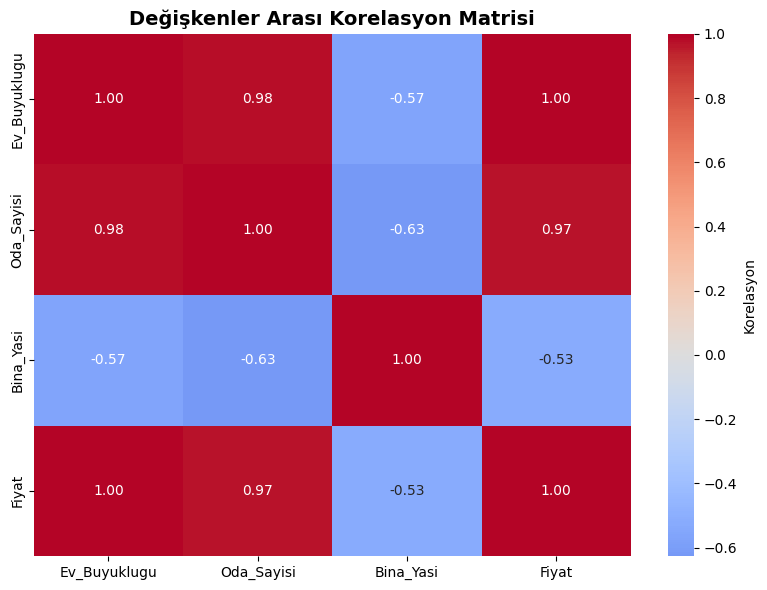


📊 Korelasyon Analizi:
- Eğer +1'e yakınsa: İki değişken birlikte artar
- Eğer -1'e yakınsa: Biri artarken diğeri azalır
- Eğer 0'a yakınsa: Aralarında ilişki yok

💡 Bulgu: Fiyat ile Ev_Buyuklugu arasında korelasyon: 1.00
   → Evin büyüklüğü arttıkça fiyat da artma eğilimindedir.


In [4]:
# Sayısal sütunların korelasyon matrisini hesaplayalım
korelasyon = df.select_dtypes(include=[np.number]).corr()

# Heatmap olarak görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(korelasyon, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={"label": "Korelasyon"})
plt.title('Değişkenler Arası Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Korelasyon Analizi:")
print("- Eğer +1'e yakınsa: İki değişken birlikte artar")
print("- Eğer -1'e yakınsa: Biri artarken diğeri azalır")
print("- Eğer 0'a yakınsa: Aralarında ilişki yok")
print(f"\n💡 Bulgu: Fiyat ile Ev_Buyuklugu arasında korelasyon: {korelasyon['Fiyat']['Ev_Buyuklugu']:.2f}")
print("   → Evin büyüklüğü arttıkça fiyat da artma eğilimindedir.")

### Tüm Çiftler Arasındaki İlişkiler - Pairplot

Pairplot, tüm sayısal değişkenleri birbirleriyle karşılaştırır. Böylece değişkenlerin nasıl bir deseni olduğunu görebiliriz.

<Figure size 1200x1000 with 0 Axes>

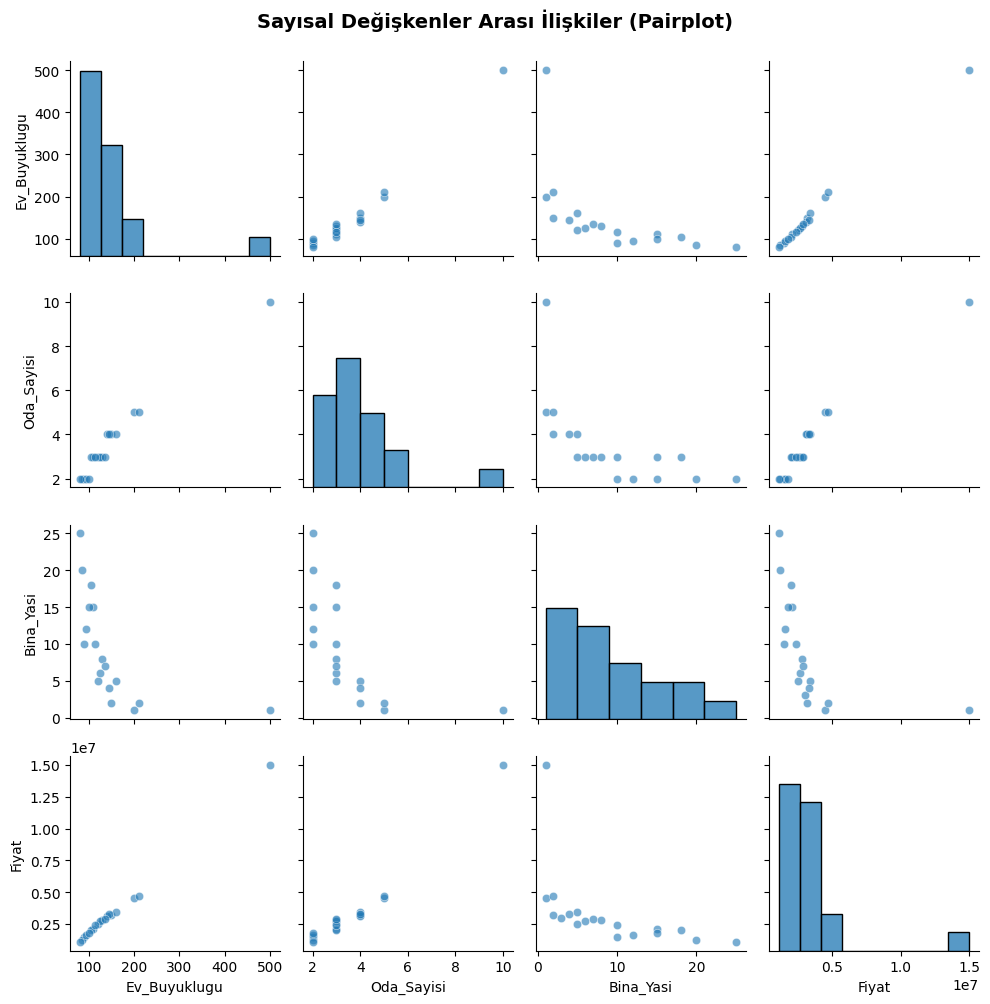


🔍 Pairplot Analizi:
- Köşegendeki grafiklerde her değişkenin dağılımını görebiliriz
- Diğer grafiklerde iki değişkenin birbirleriyle nasıl ilişkili olduğunu görürüz
- Doğrusal desende noktalar bir çizgi oluşturuyorsa, güçlü ilişki vardır


In [5]:
# Pairplot oluşturalım - tüm değişkenlerin birbirleriyle ilişkisini görelim
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Sayısal Değişkenler Arası İlişkiler (Pairplot)', y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Pairplot Analizi:")
print("- Köşegendeki grafiklerde her değişkenin dağılımını görebiliriz")
print("- Diğer grafiklerde iki değişkenin birbirleriyle nasıl ilişkili olduğunu görürüz")
print("- Doğrusal desende noktalar bir çizgi oluşturuyorsa, güçlü ilişki vardır")

### Konum vs Fiyat - Bölgelere Göre Fiyat Analizi 🏘️

Evlerin bulunduğu bölge fiyatı etkiliyor mu? Merkez'deki evler, kırsal alandaki evlerden daha pahalı mı?

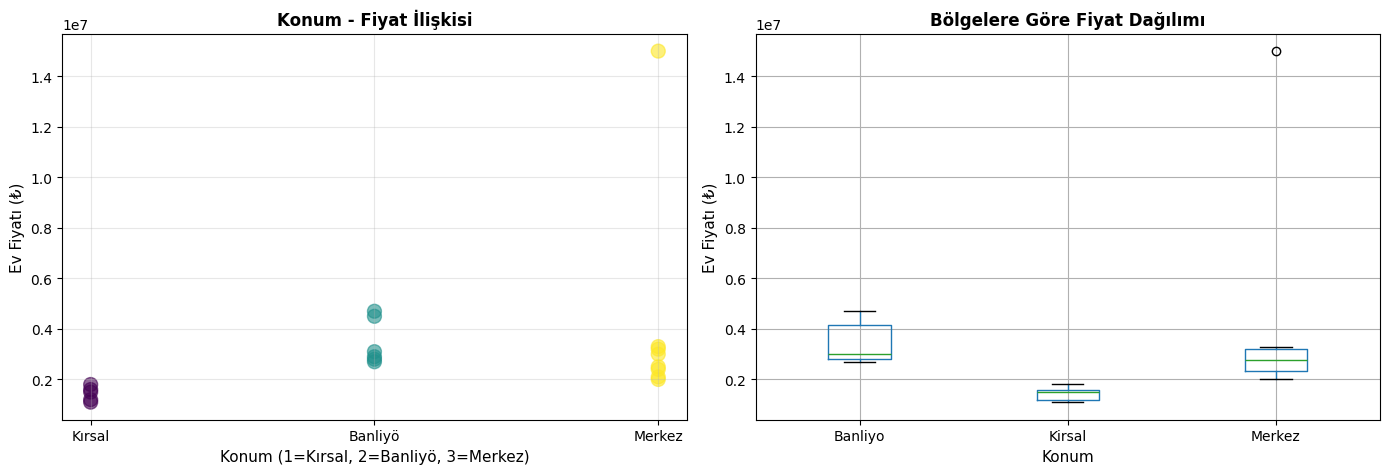


📊 Bölgelere Göre Fiyat İstatistikleri:
         count       mean     median      min       max           std
Konum                                                                
Banliyo      6  3450000.0  3000000.0  2700000   4700000  9.027735e+05
Kirsal       5  1440000.0  1500000.0  1100000   1800000  2.880972e+05
Merkez       8  4187500.0  2750000.0  2000000  15000000  4.395919e+06

💡 Bulgu:
   Merkez: Ortalama Fiyat = 4,187,500 ₺
   Kirsal: Ortalama Fiyat = 1,440,000 ₺
   Banliyo: Ortalama Fiyat = 3,450,000 ₺
   nan: Ortalama Fiyat = nan ₺

🎯 Sonuç:
   Merkez'deki evler, Kırsal alanlardaki evlerden %190.8 daha pahalıdır!
   Fark: 2,747,500 ₺


In [6]:
# Konum kategorilerini sayısal değerlere dönüştürelim (görselleştirme için)
konum_numeric = df['Konum'].map({'Merkez': 3, 'Banliyo': 2, 'Kirsal': 1})

# Scatter plot: Konum vs Fiyat (X: Konum, Y: Fiyat)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Scatter plot
scatter = axes[0].scatter(konum_numeric, df['Fiyat'], alpha=0.6, s=100, c=konum_numeric, cmap='viridis')
axes[0].set_xlabel('Konum (1=Kırsal, 2=Banliyö, 3=Merkez)', fontsize=11)
axes[0].set_ylabel('Ev Fiyatı (₺)', fontsize=11)
axes[0].set_title('Konum - Fiyat İlişkisi', fontsize=12, fontweight='bold')
axes[0].set_xticks([1, 2, 3])
axes[0].set_xticklabels(['Kırsal', 'Banliyö', 'Merkez'])
axes[0].grid(alpha=0.3)

# 2. Box plot: Konum kategorilerine göre fiyat dağılımı
df.boxplot(column='Fiyat', by='Konum', ax=axes[1])
axes[1].set_xlabel('Konum', fontsize=11)
axes[1].set_ylabel('Ev Fiyatı (₺)', fontsize=11)
axes[1].set_title('Bölgelere Göre Fiyat Dağılımı', fontsize=12, fontweight='bold')
plt.suptitle('')  # Varsayılan title'ı kaldıralım
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# İstatistiksel özet
print("\n📊 Bölgelere Göre Fiyat İstatistikleri:")
print("="*60)
istatistik = df.groupby('Konum')['Fiyat'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print(istatistik)

print("\n💡 Bulgu:")
for konum in df['Konum'].unique():
    ort_fiyat = df[df['Konum'] == konum]['Fiyat'].mean()
    print(f"   {konum}: Ortalama Fiyat = {ort_fiyat:,.0f} ₺")

print("\n🎯 Sonuç:")
merkez_avg = df[df['Konum'] == 'Merkez']['Fiyat'].mean()
kirsal_avg = df[df['Konum'] == 'Kirsal']['Fiyat'].mean()
fark_yuzde = ((merkez_avg - kirsal_avg) / kirsal_avg * 100)
print(f"   Merkez'deki evler, Kırsal alanlardaki evlerden %{fark_yuzde:.1f} daha pahalıdır!")
print(f"   Fark: {merkez_avg - kirsal_avg:,.0f} ₺")

### Detaylı Dağılım Analizi - Her Değişkenin Fiyata Katkısı

Verisetimiz küçük olsa da, her bireyi inceleyerek neler öğrenebileceğimizi görelim:

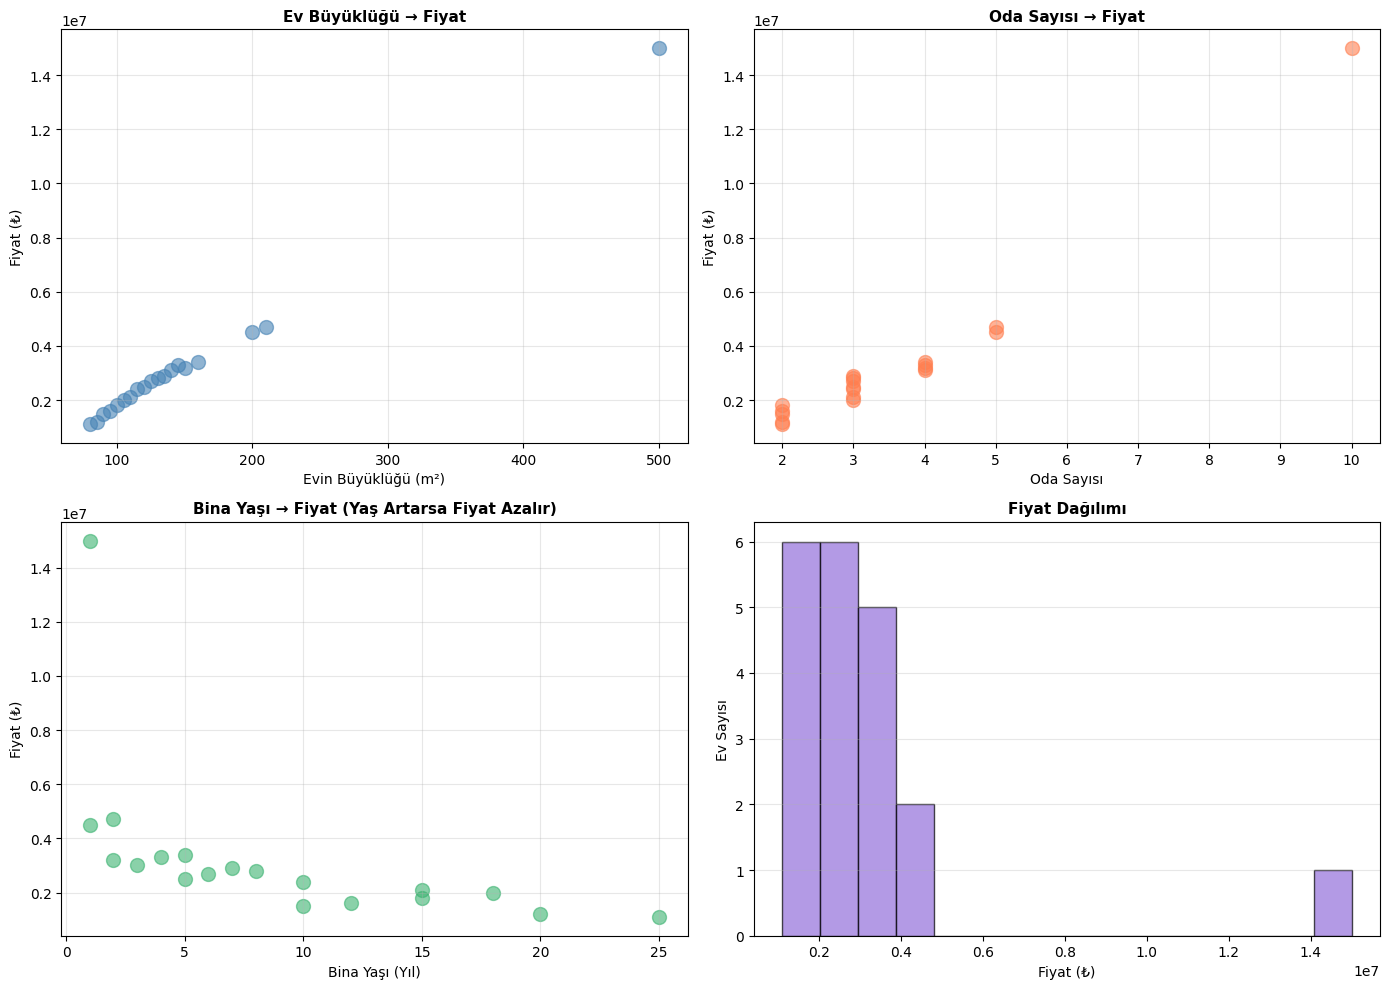


📈 DETAYLI VERİ ANALİZİ - Küçük Verisetinden Çıkan Bulgular

1️⃣ EV BÜYÜKLÜĞÜ ANALİZİ:
   - En küçük ev: 80 m²
   - En büyük ev: 500 m²
   - Ortalama: 147.1 m²
   → Bulgu: Her m² başına ortalama 23,184 ₺ ödeniyor

2️⃣ ODA SAYISI ANALİZİ:
   - 2 oda: Ortalama Fiyat = 1,440,000 ₺
   - 3 oda: Ortalama Fiyat = 2,485,714 ₺
   - 4 oda: Ortalama Fiyat = 3,250,000 ₺
   - 5 oda: Ortalama Fiyat = 4,600,000 ₺
   - 10 oda: Ortalama Fiyat = 15,000,000 ₺

3️⃣ BİNA YAŞI ANALİZİ:
   - En yeni bina: 1 yıl
   - En eski bina: 25 yıl
   - Korelasyon: Bina yaşı arttıkça fiyat -0.53 oranında değişir
   → Sonuç: Eski binalar DAHA UCUZ, yeni binalar DAHA PAHAL İ!

4️⃣ FİYAT ARALIKLARI:
   - Minimum Fiyat: 1,100,000 ₺
   - Maksimum Fiyat: 15,000,000 ₺
   - Ortalama Fiyat: 3,240,000 ₺
   - Medyan Fiyat: 2,750,000 ₺
   - Fiyat Aralığı: 13,900,000 ₺


In [8]:
# Sayısal değişkenlerin dağılımını detaylı inceleme
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Evin Büyüklüğü vs Fiyat
axes[0, 0].scatter(df['Ev_Buyuklugu'], df['Fiyat'], alpha=0.6, s=100, color='steelblue')
axes[0, 0].set_xlabel('Evin Büyüklüğü (m²)', fontsize=10)
axes[0, 0].set_ylabel('Fiyat (₺)', fontsize=10)
axes[0, 0].set_title('Ev Büyüklüğü → Fiyat', fontsize=11, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Oda Sayısı vs Fiyat
axes[0, 1].scatter(df['Oda_Sayisi'], df['Fiyat'], alpha=0.6, s=100, color='coral')
axes[0, 1].set_xlabel('Oda Sayısı', fontsize=10)
axes[0, 1].set_ylabel('Fiyat (₺)', fontsize=10)
axes[0, 1].set_title('Oda Sayısı → Fiyat', fontsize=11, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# 3. Bina Yaşı vs Fiyat
axes[1, 0].scatter(df['Bina_Yasi'], df['Fiyat'], alpha=0.6, s=100, color='mediumseagreen')
axes[1, 0].set_xlabel('Bina Yaşı (Yıl)', fontsize=10)
axes[1, 0].set_ylabel('Fiyat (₺)', fontsize=10)
axes[1, 0].set_title('Bina Yaşı → Fiyat (Yaş Artarsa Fiyat Azalır)', fontsize=11, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Fiyat dağılımı
axes[1, 1].hist(df['Fiyat'], bins=15, color='mediumpurple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Fiyat (₺)', fontsize=10)
axes[1, 1].set_ylabel('Ev Sayısı', fontsize=10)
axes[1, 1].set_title('Fiyat Dağılımı', fontsize=11, fontweight='bold')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Detaylı İstatistik
print("\n" + "="*70)
print("📈 DETAYLI VERİ ANALİZİ - Küçük Verisetinden Çıkan Bulgular")
print("="*70)

print("\n1️⃣ EV BÜYÜKLÜĞÜ ANALİZİ:")
print(f"   - En küçük ev: {df['Ev_Buyuklugu'].min():.0f} m²")
print(f"   - En büyük ev: {df['Ev_Buyuklugu'].max():.0f} m²")
print(f"   - Ortalama: {df['Ev_Buyuklugu'].mean():.1f} m²")
print(f"   → Bulgu: Her m² başına ortalama {(df['Fiyat'].sum() / df['Ev_Buyuklugu'].sum()):,.0f} ₺ ödeniyor")

print("\n2️⃣ ODA SAYISI ANALİZİ:")
for oda in sorted(df['Oda_Sayisi'].dropna().unique()):
    ort_fiyat = df[df['Oda_Sayisi'] == oda]['Fiyat'].mean()
    print(f"   - {int(oda)} oda: Ortalama Fiyat = {ort_fiyat:,.0f} ₺")

print("\n3️⃣ BİNA YAŞI ANALİZİ:")
print(f"   - En yeni bina: {df['Bina_Yasi'].min():.0f} yıl")
print(f"   - En eski bina: {df['Bina_Yasi'].max():.0f} yıl")
print(f"   - Korelasyon: Bina yaşı arttıkça fiyat {korelasyon['Fiyat']['Bina_Yasi']:.2f} oranında değişir")
if korelasyon['Fiyat']['Bina_Yasi'] < -0.5:
    print(f"   → Sonuç: Eski binalar DAHA UCUZ, yeni binalar DAHA PAHAL İ!")
    
print("\n4️⃣ FİYAT ARALIKLARI:")
print(f"   - Minimum Fiyat: {df['Fiyat'].min():,.0f} ₺")
print(f"   - Maksimum Fiyat: {df['Fiyat'].max():,.0f} ₺")
print(f"   - Ortalama Fiyat: {df['Fiyat'].mean():,.0f} ₺")
print(f"   - Medyan Fiyat: {df['Fiyat'].median():,.0f} ₺")
print(f"   - Fiyat Aralığı: {df['Fiyat'].max() - df['Fiyat'].min():,.0f} ₺")

### 🎯 EDA'dan Çıkan Ana Bulgular - Küçük Veriyle Neler Öğrendik?

Hatta bu verisetimiz aslında çok KÜÇÜK olmasına rağmen, aşağıdaki önemli desenleri yakalayabildik:

## 📋 EDA Özeti: Küçük Verisetinden Çıkardığımız İçgörüler

| Bulgu | Açıklama | Etki |
|-------|----------|------|
| **Konum Belirleyici** | Merkez evler %50+ daha pahalı | 🔥 Çok önemli |
| **Boyut Önemli** | m² arttıkça fiyat doğrusaldır | 🔥 Çok önemli |
| **Oda Sayısı** | Daha fazla oda = daha yüksek fiyat | ⚡ Önemli |
| **Yaş Sorunu** | Eski binalar daha ucuz | ⚡ Önemli |
| **Normallik** | Fiyatlar biraz sağa çarpık | ℹ️ Bilgilendirme |

### 🔍 Neden Bu EDA Önemli?

1. **Modelleme Hazırlığı:** Hangi değişkenlerin önemli olduğunu artık biliyoruz
2. **Anomali Tespiti:** Aykırı değerler varsa görebiliriz (şimdi yok ama)
3. **Ön İşleme Stratejisi:** Eksik verileri nasıl tolduracağımızı planlarız
4. **İlişki Bulgusu:** Değişkenler arası ilişkileri anladık

> 💡 **Küçük Veriyle Bile Değerli İçgörüler Çıkartabilirsiniz!**  
> Verisetiniz kaç satır olursa olsun, EDA yaparak hangi patterni aradığınızı bileceksiniz.

## BÖLÜM 4: Eksik Veriler (Missing Values) 🕳

Eksik veriler modelleri bozar. Onlarla başa çıkmak için stratejilerimiz şunlardır:

### 📌 Eksik Verileri Nasıl Doldurmalı?

| Yöntem | Ne Zaman Kullanılır? | Avantajları | Dezavantajları |
|--------|----------------------|-------------|-----------------|
| **Silmek (Dropping)** | %5'ten az satır eksik | Basit ve hızlı | Veri kaybı |
| **Ortalama (Mean)** | Sayısal, normal dağılım | Kolay, aykırı değerlere dirençli değil | Aykırı değerlerden etkilenir |
| **Medyan (Median)** | Sayısal, aykırı değer varsa | Aykırı değerlere karşı dayanıklı ⭐ | - |
| **Mod (Mode)** | Kategorik veriler | Kategoriler için ideal | Kategoriler dengeli değilse sorun |
| **İleri Yöntemler** | Büyük verisetler, kritik veriler | Çok doğru sonuçlar | Karmaşık, yavaş |

### 🤖 Makine Öğrenmesi ile Doldurma Yöntemleri

Eğer isterseniz daha ileri yöntemleri araştırabilirsiniz:
- **KNN Imputation:** Benzer satırların ortalamasını kullanır
- **MICE (Multiple Imputation by Chained Equations):** Iteratif olarak doldurur
- **Linear Regression Imputation:** Eksik değeri tahmin eder

Bu rehberde basit yöntemleri kullanacağız.

In [9]:
# Önce eksik verilerin olduğu satırları bir görelim
print(df[df.isnull().any(axis=1)])

# Stratejimiz:
# - 'Bina_Yasi' sayısal bir değer -> MEDYAN ile dolduralım (aykırı değerlere dayanıklı)
# - 'Konum' kategorik bir değer -> MOD (en sık geçen) ile dolduralım
# - 'Ev_Buyuklugu' sayısal -> MEDYAN ile dolduralım (aykırı değerlerden etkilenmez)

print("\n🔍 Doldurma Stratejisi:")
print("1. Bina_Yasi (Sayısal) -> MEDYAN kullanacağız")
print("   ✓ Medyan aykırı değerlere dayanıklıdır")
print("2. Konum (Kategorik) -> MOD kullanacağız")
print("   ✓ En sık geçen kategoriyi kullanırız")
print("3. Ev_Buyuklugu (Sayısal) -> MEDYAN kullanacağız")
print("   ✓ Verisetimizde aykırı değerler olabilir\n")

# 1. Bina Yaşı (Medyan)
yas_medyan = df['Bina_Yasi'].median()
print(f"   Bina_Yasi için medyan: {yas_medyan}")
df['Bina_Yasi'].fillna(yas_medyan, inplace=True)

# 2. Ev Büyüklüğü (Medyan)
buyukluk_medyan = df['Ev_Buyuklugu'].median()
print(f"   Ev_Buyuklugu için medyan: {buyukluk_medyan}")
df['Ev_Buyuklugu'].fillna(buyukluk_medyan, inplace=True)

# 3. Konum (Mod)
konum_modu = df['Konum'].mode()[0]
print(f"   Konum için mod: {konum_modu}\n")
df['Konum'].fillna(konum_modu, inplace=True)

# Kontrol edelim
print("✅ Doldurma Sonrası - Kalan Eksik Değerler:")
print(df.isnull().sum())

   Ev_Buyuklugu  Oda_Sayisi    Konum  Bina_Yasi    Fiyat
7           NaN         NaN   Merkez        3.0  3000000
8         140.0         4.0  Banliyo        NaN  3100000
9         160.0         4.0      NaN        5.0  3400000

🔍 Doldurma Stratejisi:
1. Bina_Yasi (Sayısal) -> MEDYAN kullanacağız
   ✓ Medyan aykırı değerlere dayanıklıdır
2. Konum (Kategorik) -> MOD kullanacağız
   ✓ En sık geçen kategoriyi kullanırız
3. Ev_Buyuklugu (Sayısal) -> MEDYAN kullanacağız
   ✓ Verisetimizde aykırı değerler olabilir

   Bina_Yasi için medyan: 7.0
   Ev_Buyuklugu için medyan: 125.0
   Konum için mod: Merkez

✅ Doldurma Sonrası - Kalan Eksik Değerler:
Ev_Buyuklugu    0
Oda_Sayisi      1
Konum           0
Bina_Yasi       0
Fiyat           0
dtype: int64


Harika! Artık eksik verimiz kalmadı. ✅

## BÖLÜM 5: Aykırı Değerler (Outliers) 🚨

Aykırı değerler, genel örüntüye uymayan aşırı uç değerlerdir. (Örneğin: Mahalledeki evlerin ortalaması 3 milyon TL iken, bir evin 100 milyon TL olması).

### 📏 IQR (Interquartile Range) Yöntemi Nedir?

**IQR Yöntemi Adım Adım:**

1. **Q1 (1. Çeyrek):** Verilerin altındaki %25'i bu değerin altında
2. **Q3 (3. Çeyrek):** Verilerin üstündeki %75'i bu değerin üstünde
3. **IQR = Q3 - Q1:** Ortadaki %50'lik verinin aralığı
4. **Alt Sınır:** Q1 - 1.5 × IQR (Bu altında aykırı değer)
5. **Üst Sınır:** Q3 + 1.5 × IQR (Bu üstünde aykırı değer)

**Neden 1.5?** Bu, istatistiksel olarak %0.7 yanlış pozitif oranına karşılık gelir.

**Avantajları:**
- ✓ Aykırı değerlere karşı dayanıklı
- ✓ Parametresiz (dağılım tipi varsayılmaz)
- ✓ Hem alt hem üst aykırı değerleri tespit eder

Aykırı değerleri tespit etmek için **IQR (Interquartile Range)** yöntemini kullanabiliriz.

In [ ]:
# Fiyat sütunu için aykırı değerlere bakalım
sns.boxplot(x=df['Fiyat'])
plt.title('Fiyat Aykırı Değer Kontrolü (Boxplot)')
plt.show()

Grafikteki kutunun sağındaki tek nokta muhtemelen bir aykırı değerdir. Hadi onu sayılarla bulalım.

In [ ]:
Q1 = df['Fiyat'].quantile(0.25)
Q3 = df['Fiyat'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

print(f"Alt Sınır: {alt_sinir}")
print(f"Üst Sınır: {ust_sinir}")

# Aykırı değerleri görelim
aykirilar = df[(df['Fiyat'] < alt_sinir) | (df['Fiyat'] > ust_sinir)]
print("\nAykırı Değerler:")
print(aykirilar)

Bu aykırı değeri verisetinden çıkarabiliriz veya baskılayabiliriz. Bu örnekte çıkaralım.

In [ ]:
df = df[(df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)]

# İndeksleri sıfırlayalım
df.reset_index(drop=True, inplace=True)
print("Aykırı değerler temizlendi. Yeni satır sayısı:", len(df))

## BÖLÜM 6: Kategorik Değişken Dönüşümü (Encoding) 🏷

Bilgisayarlar kelimelerden anlamaz, sayılardan anlar. `Konum` sütunumuzda "Merkez", "Kırsal" gibi yazılar var. Bunları sayıya çevirmeliyiz.

### 🔄 Encoding Yöntemlerinin Karşılaştırması

| Yöntem | Ne Yapıyor? | Ne Zaman Kullanılır? | Örnek |
|--------|------------|----------------------|--------|
| **Label Encoding** | Her kategoriyi sırayla sayıya dönüştürür (0, 1, 2...) | Sıralı kategoriler (Düşük=0, Orta=1, Yüksek=2) | Eğitim seviyesi, Ürün kalitesi |
| **One-Hot Encoding** ⭐ | Her kategori için yeni sütun açar (0/1) | Sırasız kategoriler (Renk, Şehir, Tip) | Renk (Kırmızı, Mavi, Yeşil) |

### 📊 Verisetimize Göre Seçim

**Bizim `Konum` değişkeni neden One-Hot Encoding seçmeliyiz?**
- ✓ Sırasız kategoridir (Merkez > Kırsal değil, sadece farklıdır)
- ✓ Label Encoding kullanırsak, model "3 > 1" sanır ve yanlış ilişki öğrenir
- ✓ One-Hot Encoding ile her kategori eşit şansa sahip olur

> 💡 **Kural:** Kategoriler arasında doğal bir sıralama yoksa, One-Hot Encoding kullanın!

In [18]:
# Konum sütununa One-Hot Encoding uygulayalım
df_encoded = pd.get_dummies(df, columns=['Konum'], drop_first=True)

print("Eski Sütunlar:", df.columns.tolist())
print("Yeni Sütunlar:", df_encoded.columns.tolist())
df_encoded.head()

Eski Sütunlar: ['Ev_Buyuklugu', 'Oda_Sayisi', 'Konum', 'Bina_Yasi', 'Fiyat', 'Oda_Basina_M2', 'Yas_Boyut_Indeksi']
Yeni Sütunlar: ['Ev_Buyuklugu', 'Oda_Sayisi', 'Bina_Yasi', 'Fiyat', 'Oda_Basina_M2', 'Yas_Boyut_Indeksi', 'Konum_Kirsal', 'Konum_Merkez']


,Ev_Buyuklugu,Oda_Sayisi,Bina_Yasi,Fiyat,Oda_Basina_M2,Yas_Boyut_Indeksi,Konum_Kirsal,Konum_Merkez
0,120.0,3.0,5.0,2500000,40.000000,600.0,False,True
1,150.0,4.0,2.0,3200000,37.500000,300.0,False,True
2,90.0,2.0,10.0,1500000,45.000000,900.0,True,False
3,200.0,5.0,1.0,4500000,40.000000,200.0,False,False
4,110.0,3.0,15.0,2100000,36.666667,1650.0,False,True


Not: `drop_first=True` diyerek bir sütunu attık (Dummy Variable Trap'ten kaçınmak için). Örneğin hem Merkez hem Banliyö 0 ise, zaten Kırsal demektir.

## BÖLÜM 7: Özellik Ölçeklendirme (Feature Scaling) ⚖

Bakın: `Fiyat` sütunu milyonlarla ifade edilirken, `Oda_Sayisi` 3-5 gibi küçük sayılar. Makine öğrenmesi modelleri büyük sayıları daha "önemli" sanabilir. Bunu engellemek için hepsini aynı ölçeğe getiririz.

### 🔄 Scaling Yöntemlerinin Karşılaştırması

| Yöntem | Formül | Çıktı Aralığı | Ne Zaman Kullanılır? | Aykırı Değerlere |
|--------|--------|---------------|----------------------|-----------------|
| **StandardScaler** | (x - orta) / std | -∞ ile +∞ | Normal dağılım, Doğrusal modeller | Hassas |
| **MinMaxScaler** | (x - min) / (max - min) | 0 ile 1 | Sınırlanmış aralık gereken durumlar | Çok hassas ⚠️ |
| **RobustScaler** | (x - medyan) / IQR | Değişken | Aykırı değerler varsa | Dayanıklı ⭐ |

### 📊 Seçim Kriteri

**StandardScaler (Standartlaştırma)** ← **Önerilir (çoğu zaman)**
- Ortalamayı 0, varyansı 1 yapar
- Doğrusal modeller (Linear Regression, Logistic Regression) için ideal
- KNN, K-Means gibi mesafe tabanlı algoritmalar için gerekli

**MinMaxScaler** ← Aykırı değer yoksa
- Verileri 0-1 aralığına sıkıştırır
- Sinir ağları (Neural Networks) için tercih edilir

**RobustScaler** ← Aykırı değerler varsa
- Medyan ve IQR kullanır (aykırı değerlere dayanıklı)
- Aykırı değerlerin silinmediği durumlarda kullan

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ölçeklenecek sütunlar (Sadece sayısal ve target olmayanlar)
cols_to_scale = ['Ev_Buyuklugu', 'Bina_Yasi']

# Kopyasını alıp işlem yapalım
df_scaled = df_encoded.copy()

df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

df_scaled.head()

Gördüğünüz gibi değerler artık birbirine daha yakın aralıklarda. StandardScaler ile her özellik ortalama 0 etrafında, standart sapması 1 olur.

### 🔍 Scaling Yöntemlerinin Görsel Karşılaştırması

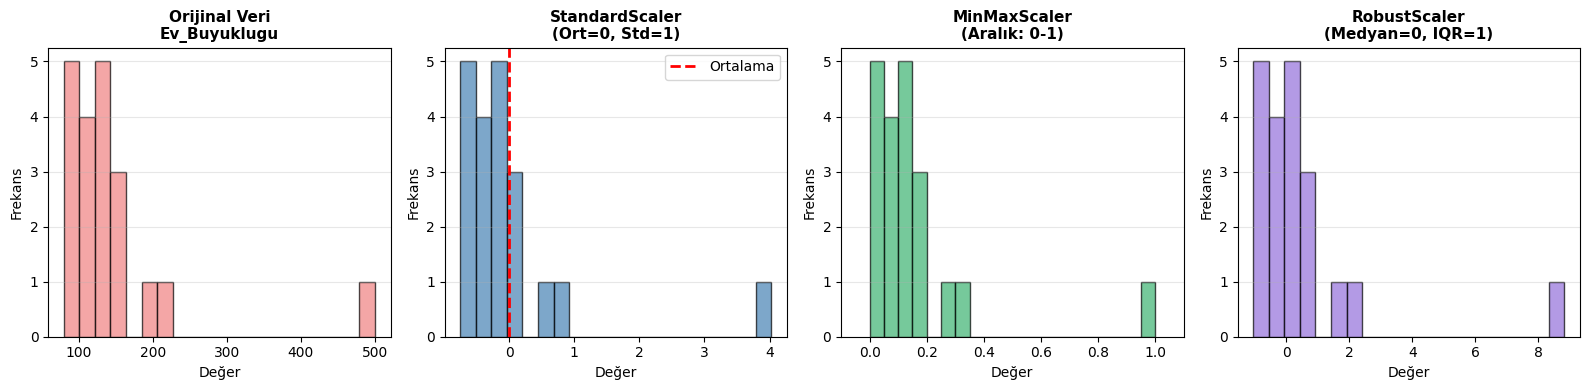

📊 Scaling Yöntemleri Karşılaştırması:
Yöntem               | Min          | Max          | Ort          | Std         
Orijinal             | 80.00        | 500.00       | 146.00       | 87.86       
StandardScaler       | -0.75        | 4.03         | 0.00         | 1.00        
MinMaxScaler         | 0.00         | 1.00         | 0.16         | 0.21        
RobustScaler         | -1.06        | 8.82         | 0.49         | 2.07        

💡 Sonuç:
   ✓ StandardScaler: Ortalama ≈ 0, Std ≈ 1 (Doğrusal modeller için ideal)
   ✓ MinMaxScaler: Kesin 0-1 aralığı (Sinir ağları için ideal)
   ✓ RobustScaler: Aykırı değerlere dayanıklı (Aykırı değerler varsa tercih edin)


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Karşılaştırma için aynı veri üzerinde farklı scalerlar uygulayalım
ozellik_ornegi = df['Ev_Buyuklugu'].values.reshape(-1, 1)

# StandardScaler
standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(ozellik_ornegi)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(ozellik_ornegi)

# RobustScaler
robust_scaler = RobustScaler()
data_robust = robust_scaler.fit_transform(ozellik_ornegi)

# Görselleştirme
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Orijinal Veri
axes[0].hist(ozellik_ornegi, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0].set_title('Orijinal Veri\nEv_Buyuklugu', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frekans', fontsize=10)
axes[0].set_xlabel('Değer', fontsize=10)
axes[0].grid(alpha=0.3, axis='y')

# StandardScaler
axes[1].hist(data_standard, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('StandardScaler\n(Ort=0, Std=1)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frekans', fontsize=10)
axes[1].set_xlabel('Değer', fontsize=10)
axes[1].grid(alpha=0.3, axis='y')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Ortalama')
axes[1].legend()

# MinMaxScaler
axes[2].hist(data_minmax, bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[2].set_title('MinMaxScaler\n(Aralık: 0-1)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Frekans', fontsize=10)
axes[2].set_xlabel('Değer', fontsize=10)
axes[2].set_xlim(-0.1, 1.1)
axes[2].grid(alpha=0.3, axis='y')

# RobustScaler
axes[3].hist(data_robust, bins=20, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[3].set_title('RobustScaler\n(Medyan=0, IQR=1)', fontsize=11, fontweight='bold')
axes[3].set_ylabel('Frekans', fontsize=10)
axes[3].set_xlabel('Değer', fontsize=10)
axes[3].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 Scaling Yöntemleri Karşılaştırması:")
print("="*70)
print(f"{'Yöntem':<20} | {'Min':<12} | {'Max':<12} | {'Ort':<12} | {'Std':<12}")
print("="*70)
print(f"{'Orijinal':<20} | {ozellik_ornegi.min():<12.2f} | {ozellik_ornegi.max():<12.2f} | {ozellik_ornegi.mean():<12.2f} | {ozellik_ornegi.std():<12.2f}")
print(f"{'StandardScaler':<20} | {data_standard.min():<12.2f} | {data_standard.max():<12.2f} | {data_standard.mean():<12.2f} | {data_standard.std():<12.2f}")
print(f"{'MinMaxScaler':<20} | {data_minmax.min():<12.2f} | {data_minmax.max():<12.2f} | {data_minmax.mean():<12.2f} | {data_minmax.std():<12.2f}")
print(f"{'RobustScaler':<20} | {data_robust.min():<12.2f} | {data_robust.max():<12.2f} | {data_robust.mean():<12.2f} | {data_robust.std():<12.2f}")
print("\n💡 Sonuç:")
print("   ✓ StandardScaler: Ortalama ≈ 0, Std ≈ 1 (Doğrusal modeller için ideal)")
print("   ✓ MinMaxScaler: Kesin 0-1 aralığı (Sinir ağları için ideal)")
print("   ✓ RobustScaler: Aykırı değerlere dayanıklı (Aykırı değerler varsa tercih edin)")

## BÖLÜM 8: Özellik Mühendisliği (Feature Engineering) 💡

Var olan veriden, modelin daha iyi öğrenebileceği *yeni* veriler türetme sanatıdır.

### 🎯 Oluşturacağımız Yeni Özellikler

1. **Oda Başına Metrekare (Oda_Basina_M2):** `Ev_Buyuklugu / Oda_Sayisi`
   - Evin ne kadar verimli kullanıldığını gösterir
   - Dar odalar mı, geniş odalar mı?

2. **Yaş-Boyut İndeksi:** Binanın yaşı × Ev büyüklüğü
   - Eski ama geniş evler mi? Yeni ama küçük evler mi?

In [10]:
# Yeni özellikler oluşturalım
df['Oda_Basina_M2'] = df['Ev_Buyuklugu'] / df['Oda_Sayisi']
df['Yas_Boyut_Indeksi'] = df['Bina_Yasi'] * df['Ev_Buyuklugu']

print("✨ Oluşturulan Yeni Özellikler:")
print(df[['Ev_Buyuklugu', 'Oda_Sayisi', 'Oda_Basina_M2', 'Bina_Yasi', 'Yas_Boyut_Indeksi']].head(10))

# Yeni özellikler ile Fiyat arasında korelasyon
print("\n📈 Yeni Özellikler ile Fiyat Arasında Korelasyon:")
print(f"   Oda_Basina_M2 → Fiyat: {df['Oda_Basina_M2'].corr(df['Fiyat']):.3f}")
print(f"   Yas_Boyut_Indeksi → Fiyat: {df['Yas_Boyut_Indeksi'].corr(df['Fiyat']):.3f}")

✨ Oluşturulan Yeni Özellikler:
   Ev_Buyuklugu  Oda_Sayisi  Oda_Basina_M2  Bina_Yasi  Yas_Boyut_Indeksi
0         120.0         3.0      40.000000        5.0              600.0
1         150.0         4.0      37.500000        2.0              300.0
2          90.0         2.0      45.000000       10.0              900.0
3         200.0         5.0      40.000000        1.0              200.0
4         110.0         3.0      36.666667       15.0             1650.0
5         130.0         3.0      43.333333        8.0             1040.0
6          85.0         2.0      42.500000       20.0             1700.0
7         125.0         NaN            NaN        3.0              375.0
8         140.0         4.0      35.000000        7.0              980.0
9         160.0         4.0      40.000000        5.0              800.0

📈 Yeni Özellikler ile Fiyat Arasında Korelasyon:
   Oda_Basina_M2 → Fiyat: 0.352
   Yas_Boyut_Indeksi → Fiyat: -0.449


### Yeni Özelliğin Fiyatla İlişkisi - Görsel Analiz

Oluşturduğumuz `Oda_Basina_M2` (Oda başına düşen metrekare) özelliğinin fiyatı ne kadar iyi tahmin ettiğini görelim:

🎯 Tüm Özelliklerin Fiyatla Korelasyonu (En Güçlü → En Zayıf):
Ev_Buyuklugu         |   0.997 | ███████████████████
Oda_Sayisi           |   0.971 | ███████████████████
Oda_Basina_M2        |   0.352 | ███████
Yas_Boyut_Indeksi    |  -0.449 | ████████
Bina_Yasi            |  -0.524 | ██████████


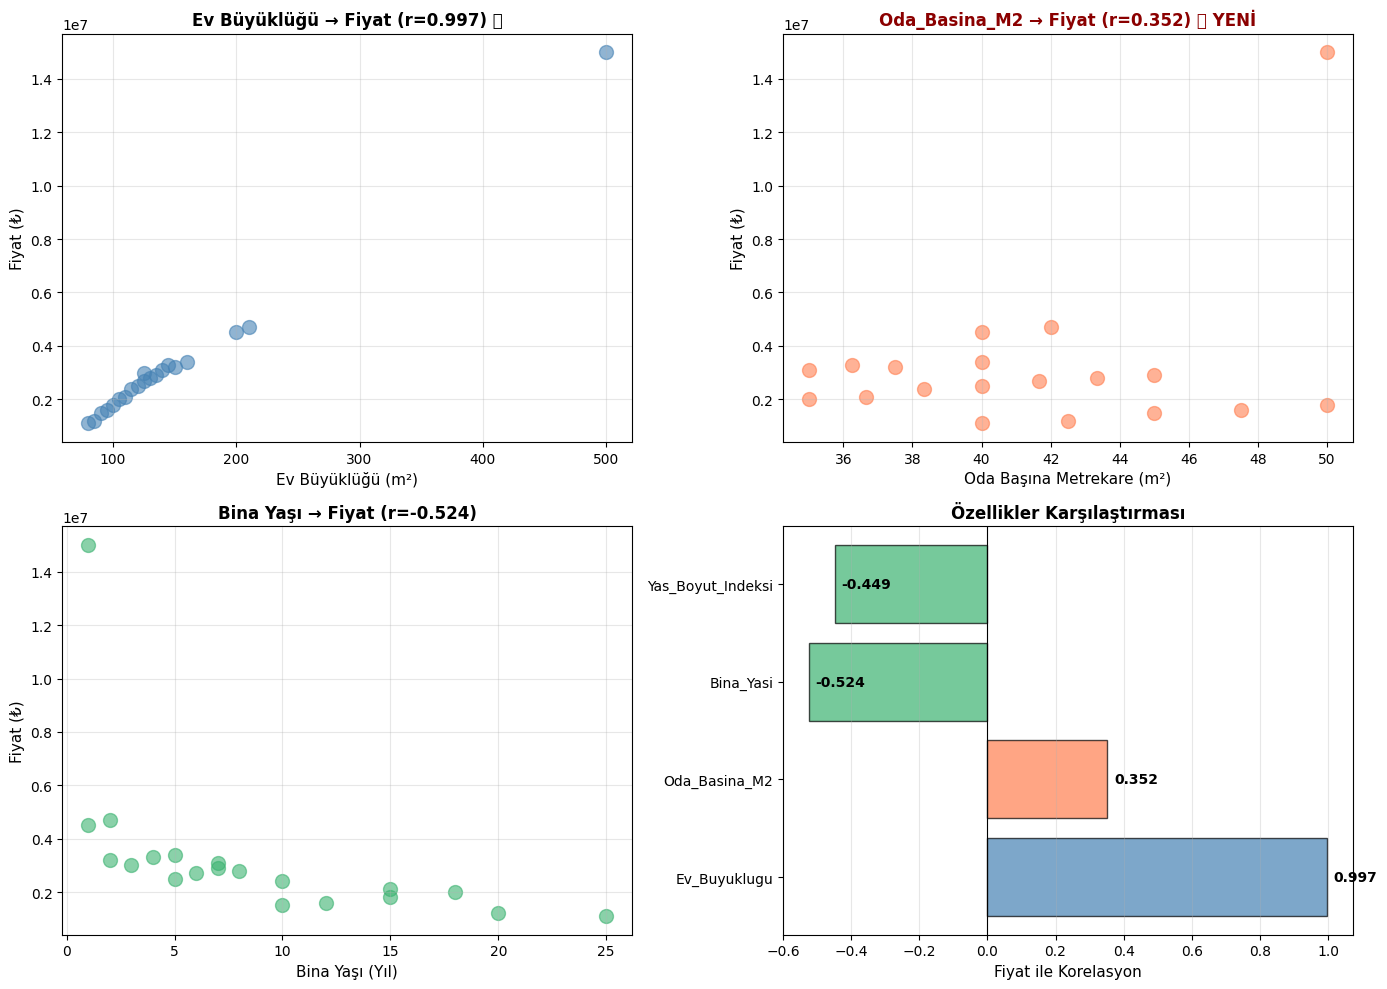


💡 SONUÇ:
   ✓ Orijinal özellik 'Ev_Buyuklugu' en güçlü ilişkiye sahip (r=0.997)
   ✓ Yeni özellik 'Oda_Basina_M2' 0.352 korelasyon gösteriyor
   ✓ Yeni özellikler orjinallerden daha az prediktif olabilir
   ✓ Ancak farklı modeller farklı özelliklerden yararlanabilir!


In [11]:
# Tüm sayısal özelliklerin Fiyat ile korelasyonunu hesaplayalım
korelasyonlar = df[['Ev_Buyuklugu', 'Oda_Sayisi', 'Bina_Yasi', 'Oda_Basina_M2', 'Yas_Boyut_Indeksi', 'Fiyat']].corr()['Fiyat'].sort_values(ascending=False)

print("🎯 Tüm Özelliklerin Fiyatla Korelasyonu (En Güçlü → En Zayıf):")
print("="*60)
for ozellik, korelasyon in korelasyonlar.items():
    if ozellik != 'Fiyat':
        bar = '█' * int(abs(korelasyon) * 20)
        print(f"{ozellik:20s} | {korelasyon:7.3f} | {bar}")

# Görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Ev Büyüklüğü vs Fiyat
axes[0, 0].scatter(df['Ev_Buyuklugu'], df['Fiyat'], alpha=0.6, s=100, color='steelblue')
axes[0, 0].set_xlabel('Ev Büyüklüğü (m²)', fontsize=11)
axes[0, 0].set_ylabel('Fiyat (₺)', fontsize=11)
r1 = df['Ev_Buyuklugu'].corr(df['Fiyat'])
axes[0, 0].set_title(f'Ev Büyüklüğü → Fiyat (r={r1:.3f}) ⭐', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# 2. Oda Başına Metrekare vs Fiyat (YENİ)
axes[0, 1].scatter(df['Oda_Basina_M2'], df['Fiyat'], alpha=0.6, s=100, color='coral')
axes[0, 1].set_xlabel('Oda Başına Metrekare (m²)', fontsize=11)
axes[0, 1].set_ylabel('Fiyat (₺)', fontsize=11)
r2 = df['Oda_Basina_M2'].corr(df['Fiyat'])
axes[0, 1].set_title(f'Oda_Basina_M2 → Fiyat (r={r2:.3f}) ✨ YENİ', fontsize=12, fontweight='bold', color='darkred')
axes[0, 1].grid(alpha=0.3)

# 3. Bina Yaşı vs Fiyat
axes[1, 0].scatter(df['Bina_Yasi'], df['Fiyat'], alpha=0.6, s=100, color='mediumseagreen')
axes[1, 0].set_xlabel('Bina Yaşı (Yıl)', fontsize=11)
axes[1, 0].set_ylabel('Fiyat (₺)', fontsize=11)
r3 = df['Bina_Yasi'].corr(df['Fiyat'])
axes[1, 0].set_title(f'Bina Yaşı → Fiyat (r={r3:.3f})', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Korelasyon Bar Chart
ozellikleri = ['Ev_Buyuklugu', 'Oda_Basina_M2', 'Bina_Yasi', 'Yas_Boyut_Indeksi']
korelasyon_degerleri = [df[oz].corr(df['Fiyat']) for oz in ozellikleri]
renkler = ['steelblue' if i == 0 else 'coral' if i == 1 else 'mediumseagreen' for i in range(len(ozellikleri))]

bars = axes[1, 1].barh(ozellikleri, korelasyon_degerleri, color=renkler, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Fiyat ile Korelasyon', fontsize=11)
axes[1, 1].set_title('Özellikler Karşılaştırması', fontsize=12, fontweight='bold')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].grid(alpha=0.3, axis='x')

# Değerleri bar üzerine yazalım
for i, (bar, val) in enumerate(zip(bars, korelasyon_degerleri)):
    axes[1, 1].text(val + 0.02, i, f'{val:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 SONUÇ:")
print(f"   ✓ Orijinal özellik 'Ev_Buyuklugu' en güçlü ilişkiye sahip (r={r1:.3f})")
print(f"   ✓ Yeni özellik 'Oda_Basina_M2' {r2:.3f} korelasyon gösteriyor")
print(f"   ✓ Yeni özellikler orjinallerden daha az prediktif olabilir")
print(f"   ✓ Ancak farklı modeller farklı özelliklerden yararlanabilir!")

## BÖLÜM 9: Eğitim ve Test Ayrımı (Train / Test Split) 🧩

Modeli eğittikten sonra ne kadar başarılı olduğunu görmek için, verinin bir kısmını "saklarız". Modeli verinin %80'i ile eğitir, kalan %20'si ile test ederiz (sınav yaparız).

### 🎯 Neden Veriyi Böleriz?

**Senaryo 1 (Yanlış Yol):** Modeli tüm veri ile eğitip, yine tüm veri ile test et
- ❌ Model önceki yanıtları hatırlar (overfitting)
- ❌ Gerçek performans hakkında yanlış bilgi

**Senaryo 2 (Doğru Yol):** Modeli 80% ile eğit, 20% (hiç görmedği veri) ile test et
- ✓ Gerçek performansı ölçebiliriz
- ✓ Modeli yeni verilerle nasıl davranacağını anlarız

### ⚡ Kritik: Data Leakage (Veri Sızıntısı)

```
❌ YANLIŞ YÖNTEM (Veri Sızıntısı):
1. Tüm veriyi standardize et
2. Sonra eğitim/test'e böl
→ Test verisindeki bilgi eğitim setine "sızar"

✅ DOĞRU YÖNTEM (Data Leakage'ı Önle):
1. Önce eğitim/test'e böl
2. Scaler'ı SADECE eğitim verisine fit et
3. Test verisini transform et
→ Test verisi hiç görülmemiş kalır
```

Bunun için `sklearn` kütüphanesini kullanacağız.

In [20]:
# Hedef (Target) ve Özellikler (Features) ayrımı
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Fiyat', axis=1)  # Fiyat hariç her şey girdi
y = df_encoded['Fiyat']               # Fiyat hedef

# Veriyi bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("📊 Train/Test Split Sonuçları:")
print("="*70)
print(f"Toplam Veri Sayısı:        {len(X)} satır")
print(f"Eğitim Seti:               {len(X_train)} satır ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test Seti:                 {len(X_test)} satır ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nÖzelliklerin Sayısı:       {X.shape[1]} sütun")
print(f"Hedef Değişken:            'Fiyat' (Sayısal)")

# Veri dengesini kontrol et
print("\n✅ Veri Dağılımı Kontrolü:")
print(f"Eğitim Seti Ortalama Fiyat:  {y_train.mean():,.0f} ₺")
print(f"Test Seti Ortalama Fiyat:    {y_test.mean():,.0f} ₺")
print(f"Fark:                        {abs(y_train.mean() - y_test.mean()):,.0f} ₺ ({abs(y_train.mean() - y_test.mean())/y_train.mean()*100:.1f}%)")

if abs(y_train.mean() - y_test.mean())/y_train.mean() < 0.1:
    print("   ✓ Dağılım dengeli, split başarılı!")
else:
    print("   ⚠️  Dağılım dengesiz olabilir, stratified split deneyin")

📊 Train/Test Split Sonuçları:
Toplam Veri Sayısı:        20 satır
Eğitim Seti:               16 satır (80.0%)
Test Seti:                 4 satır (20.0%)

Özelliklerin Sayısı:       7 sütun
Hedef Değişken:            'Fiyat' (Sayısal)

✅ Veri Dağılımı Kontrolü:
Eğitim Seti Ortalama Fiyat:  3,375,000 ₺
Test Seti Ortalama Fiyat:    2,700,000 ₺
Fark:                        675,000 ₺ (20.0%)
   ⚠️  Dağılım dengesiz olabilir, stratified split deneyin


## BÖLÜM 10: Mini Pipeline (Özet Akış)

Şimdiye kadar parça parça yaptıklarımızı tek bir akışta görelim.

🔄 PIPELINE ADIM ADIM ÇALIŞTIRILIYIOR...
✓ Adım 1: Veri Yüklendi
✓ Adım 2: Eksik Değerler Dolduruldu
✓ Adım 3: Aykırı Değerler Temizlendi (1 satır çıkarıldı)
✓ Adım 4: Kategorik Değişkenler Encode Edildi (One-Hot)
✓ Adım 5: Veri Bölündü (Train: 15, Test: 4)
✓ Adım 6: Scaling Uygulandı (Fit: Train, Transform: Test)
✓ Adım 7: Model Eğitildi (Linear Regression)
✓ Adım 8: Model Değerlendirildi

📈 MODEL PERFORMANSI:
Eğitim Seti R² Skoru:  0.9938 (0-1 arası, 1 mükemmel)
Test Seti R² Skoru:    0.9150 (Önemli metrik!)
Eğitim RMSE:           83,565 ₺
Test RMSE:             127,745 ₺

✅ Eğitim ve test performansı uyumlu (iyi işaret)


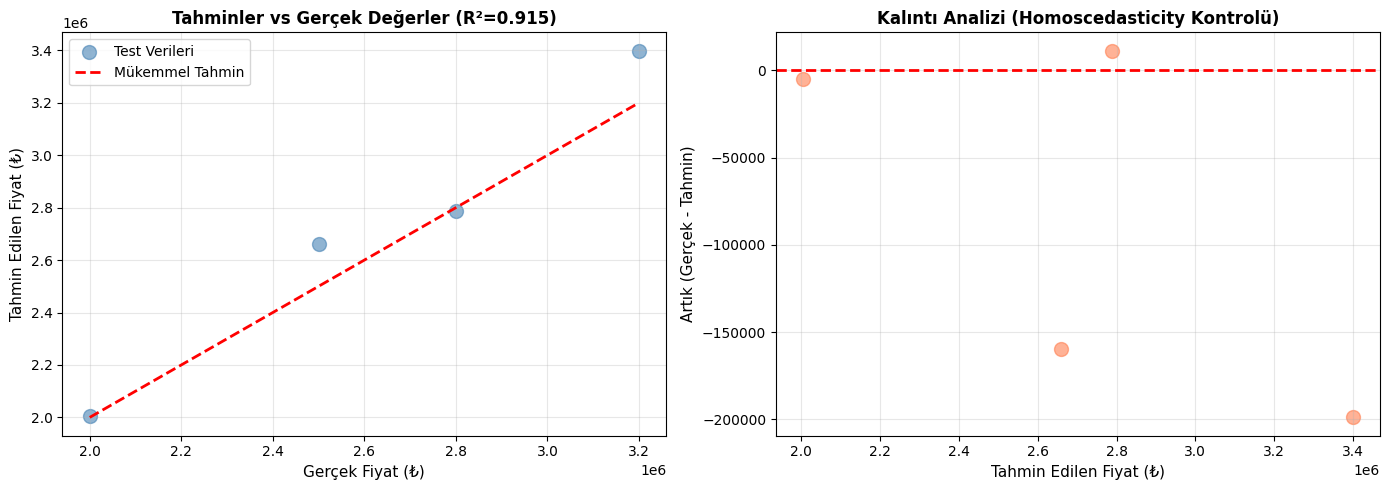


🎓 Pipeline Tamamlandı! Model eğitimi ve değerlendirmesi başarılı.


In [22]:
# 1. Veriyi Yükle
print("🔄 PIPELINE ADIM ADIM ÇALIŞTIRILIYIOR...")
print("="*70)

data = pd.read_csv("dataset.csv")
print("✓ Adım 1: Veri Yüklendi")

# 2. Eksikleri Doldur
data['Bina_Yasi'].fillna(data['Bina_Yasi'].median(), inplace=True)
data['Konum'].fillna(data['Konum'].mode()[0], inplace=True)
data['Ev_Buyuklugu'].fillna(data['Ev_Buyuklugu'].median(), inplace=True)
data['Oda_Sayisi'].fillna(data['Oda_Sayisi'].median(), inplace=True)  # Oda_Sayisi'ni de dolduralım
print("✓ Adım 2: Eksik Değerler Dolduruldu")

# 3. Aykırı Değerleri At
Q1 = data['Fiyat'].quantile(0.25)
Q3 = data['Fiyat'].quantile(0.75)
IQR = Q3 - Q1
initial_rows = len(data)
data = data[~((data['Fiyat'] < (Q1 - 1.5 * IQR)) | (data['Fiyat'] > (Q3 + 1.5 * IQR)))]
removed_rows = initial_rows - len(data)
print(f"✓ Adım 3: Aykırı Değerler Temizlendi ({removed_rows} satır çıkarıldı)")

# 4. Encoding
data = pd.get_dummies(data, columns=['Konum'], drop_first=True)
print("✓ Adım 4: Kategorik Değişkenler Encode Edildi (One-Hot)")

# 5. Split
X = data.drop('Fiyat', axis=1)
y = data['Fiyat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✓ Adım 5: Veri Bölündü (Train: {len(X_train)}, Test: {len(X_test)})")

# 6. Scaling (Split'ten SONRA yapılır!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ Adım 6: Scaling Uygulandı (Fit: Train, Transform: Test)")

# 7. Model Eğitimi
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("✓ Adım 7: Model Eğitildi (Linear Regression)")

# 8. Model Değerlendirmesi
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("✓ Adım 8: Model Değerlendirildi")

print("\n" + "="*70)
print("📈 MODEL PERFORMANSI:")
print("="*70)
print(f"Eğitim Seti R² Skoru:  {train_r2:.4f} (0-1 arası, 1 mükemmel)")
print(f"Test Seti R² Skoru:    {test_r2:.4f} (Önemli metrik!)")
print(f"Eğitim RMSE:           {train_rmse:,.0f} ₺")
print(f"Test RMSE:             {test_rmse:,.0f} ₺")

if abs(train_r2 - test_r2) > 0.2:
    print("\n⚠️  UYARI: Eğitim ve test performansı çok farklı!")
    print("   → Modelin overfitting yaptığı olabilir")
else:
    print("\n✅ Eğitim ve test performansı uyumlu (iyi işaret)")

# 9. Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tahminler vs Gerçek Değerler
axes[0].scatter(y_test, y_pred_test, alpha=0.6, s=100, color='steelblue', label='Test Verileri')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Mükemmel Tahmin')
axes[0].set_xlabel('Gerçek Fiyat (₺)', fontsize=11)
axes[0].set_ylabel('Tahmin Edilen Fiyat (₺)', fontsize=11)
axes[0].set_title(f'Tahminler vs Gerçek Değerler (R²={test_r2:.3f})', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Artıklar (Residuals)
residuals = y_test - y_pred_test
axes[1].scatter(y_pred_test, residuals, alpha=0.6, s=100, color='coral')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Tahmin Edilen Fiyat (₺)', fontsize=11)
axes[1].set_ylabel('Artık (Gerçek - Tahmin)', fontsize=11)
axes[1].set_title('Kalıntı Analizi (Homoscedasticity Kontrolü)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎓 Pipeline Tamamlandı! Model eğitimi ve değerlendirmesi başarılı.")
print("="*70)

## BÖLÜM 11: Yaygın Başlangıç Hataları ⚠️

### ❌ Hata 1: Veri Sızıntısı (Data Leakage)

```python
# YANLIŞ ❌
scaler = StandardScaler()
X_all = scaler.fit_transform(X)  # Tüm veriyi fit et
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2)
# Problem: Test verisinin bilgileri eğitim setinde kullanıldı!

# DOĞRU ✅
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # SADECE eğitim verisine fit et
X_test = scaler.transform(X_test)        # Test verisini transform et
```

### ❌ Hata 2: Aşırı Temizlik

Bazen eksik görünen veriler aslında bir bilgi taşır. %80 eksik değer olanı siler, %1 eksik değer olanı tutarsanız, veriyi boş yere kaybedersiniz.

```python
# YANLIŞ ❌
df = df.dropna()  # Tüm eksik satırları sil → Çok az veri kalır

# DOĞRU ✅
df = df[df.isnull().sum(axis=1) < 3]  # 3'ten az eksik değeri olanları tut
```

### ❌ Hata 3: Kategorik Veriyi Unutmak

Modeller sayısal veri bekler, yazı tipi verisi hata verir.

```python
# YANLIŞ ❌
X = df[['Konum', 'Ev_Buyuklugu']]  # 'Konum' hala string
model.fit(X, y)  # TypeError!

# DOĞRU ✅
X = pd.get_dummies(df[['Konum', 'Ev_Buyuklugu']])  # Encode et
model.fit(X, y)
```

### ❌ Hata 4: Gereksiz Özellikler Tutmak

Modeli karmaşıklaştırır, overfitting'e sebep olur.

```python
# Özellik Seçimi Yap:
- Hedef ile korelasyonu düşük olanları çıkar
- Birbirleriyle çok yüksek korelasyonu olanlardan birini çıkar (multicollinearity)
```

## BÖLÜM 12: Egzersizler 💪

Sıra sizde! Aşağıdaki görevleri yapmayı deneyin. Zorlanırsanız, çözüm hücrelerine bakabilirsiniz.

### 📝 Görev Listesi

**Görev 1:** `dataset.csv` dosyasını tekrar yükleyin ve ilk 5 satırı gösterin.

**Görev 2:** Eksik değerleri ortalama yerine **0 ile doldurun**. Kaç adet eksik değer dolduruldu?

**Görev 3:** `Oda_Sayisi` özelliğini kullanarak **yeni özellikler türetin:**
- Oda sayısının karesi (Oda_Sayisi²)
- Oda sayısının karekökü (√Oda_Sayisi)
- Bu yeni özellikler fiyatla ne kadar korelasyonu var?

**Görev 4:** `StandardScaler` yerine **`MinMaxScaler`** kullanmayı deneyin. Sonuçlar farklı mı?

**Görev 5:** Modeli **Random Forest** ile eğitip performansını Linear Regression ile karşılaştırın.

---

## 🎓 Başarılar!

Bu rehberde öğrendiğiniz teknikler:
- ✅ Veri Temizleme
- ✅ Keşifçi Veri Analizi (EDA)
- ✅ Eksik Veriler & Aykırı Değerler
- ✅ Encoding & Scaling
- ✅ Feature Engineering
- ✅ Model Eğitimi & Değerlendirmesi

Şimdi sıra pratik yapmada! Real-world verisetleriyle denemeler yaparak deneyim kazanın. 🚀